# Minimax Algorithm
Minimax is a kind of backtracking algorithm that is used in decision making and game theory to find the optimal move for a player, assuming that your opponent also plays optimally. 

There are two parts in a Minimax algorithm - Maximizer / Minimizer. The maximizer tries to get the highest score possible while the minimizer tries to do the opposite and get the lowest score possible.

The algorithm search, recursively, the best move that leads the Max player to win or not lose (draw). It consider the current state of the game and the available moves at that state, then for each valid move it plays (alternating min and max) until it finds a terminal state (win, draw or lose).

### Pseudocode for Minimax Algorithm
function minimax(board, depth, isMaximizingPlayer):

    if current board state is a terminal state :
        return value of the board
    
    if isMaximizingPlayer :
        bestVal = -INFINITY 
        for each move in board :
            value = minimax(board, depth+1, false)
            bestVal = max( bestVal, value) 
        return bestVal

    else :
        bestVal = +INFINITY 
        for each move in board :
            value = minimax(board, depth+1, true)
            bestVal = min( bestVal, value) 
        return bestVal

## An implementation of Minimax AI Algorithm in Tic Tac Toe, using Python.

In [1]:
# Importing the necessary classes needed for the program
from math import inf as infinity
from random import choice

HUMAN = -1
AI = +1
board = [
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0],
]

#  Function to heuristic evaluation of state.
def evaluate(state):
    if wins(state, AI):
        score = +1
    elif wins(state, HUMAN):
        score = -1
    else:
        score = 0
    return score


def wins(state, player):
    win_state = [
        [state[0][0], state[0][1], state[0][2]], [state[1][0], state[1][1], state[1][2]], [state[2][0], state[2][1], state[2][2]],
        [state[0][0], state[1][0], state[2][0]], [state[0][1], state[1][1], state[2][1]], [state[0][2], state[1][2], state[2][2]],
        [state[0][0], state[1][1], state[2][2]],[state[2][0], state[1][1], state[0][2]],
    ]
    if [player, player, player] in win_state:
        return True
    else:
        return False

#    This function test if the human or Computer wins
def game_over(state):
    return wins(state, HUMAN) or wins(state, AI)

def empty_cells(state):
    cells = []
    for x, row in enumerate(state):
        for y, cell in enumerate(row):
            if cell == 0:
                cells.append([x, y])
    return cells

#    A move is valid if the chosen cell is empty
def valid_move(x, y):
    if [x, y] in empty_cells(board):
        return True
    else:
        return False

#    Set the move on board, if the coordinates are valid
def set_move(x, y, player):
    if valid_move(x, y):
        board[x][y] = player
        return True
    else:
        return False


# AI function that implements Minimax algorithm
def minimax(state, depth, player):
    if player == AI:
        best = [-1, -1, -infinity]
    else:
        best = [-1, -1, +infinity]

    if depth == 0 or game_over(state):
        score = evaluate(state)
        return [-1, -1, score]

    for cell in empty_cells(state):
        x, y = cell[0], cell[1]
        state[x][y] = player
        score = minimax(state, depth - 1, -player)
        state[x][y] = 0
        score[0], score[1] = x, y

        if player == AI:
            if score[2] > best[2]:
                best = score  # max value
        else:
            if score[2] < best[2]:
                best = score  # min value

    return best

#prints the board on the console
def render(state, AI_Move, Human_Move):
    chars = {
        -1: Human_Move,
        +1: AI_Move,
        0: ' '
    }
    str_line = '---------------'

    print('\n' + str_line)
    for row in state:
        for cell in row:
            symbol = chars[cell]
            print(f'| {symbol} |', end='')
        print('\n' + str_line)

#Code for AI turn
def ai_turn(AI_Move, Human_Move):
    depth = len(empty_cells(board))
    if depth == 0 or game_over(board):
        return

    
    print(f'Computer turn [{AI_Move}]')
    render(board, AI_Move, Human_Move)

    if depth == 9:
        x = choice([0, 1, 2])
        y = choice([0, 1, 2])
    else:
        move = minimax(board, depth, AI)
        x, y = move[0], move[1]

    set_move(x, y, AI)

#code for human turn
def human_turn(AI_Move, Human_Move):
    depth = len(empty_cells(board))
    if depth == 0 or game_over(board):
        return

    # Dictionary of valid moves
    move = -1
    moves = {
        1: [0, 0], 2: [0, 1], 3: [0, 2],
        4: [1, 0], 5: [1, 1], 6: [1, 2],
        7: [2, 0], 8: [2, 1], 9: [2, 2],
    }

    
    print(f'Human turn [{Human_Move}]')
    render(board, AI_Move, Human_Move)

    while move < 1 or move > 9:
        try:
            move = int(input('Enter your move [1..9]: '))
            coord = moves[move]
            can_move = set_move(coord[0], coord[1], HUMAN)

            if not can_move:
                print('Bad move')
                move = -1
        except (EOFError, KeyboardInterrupt):
            print('Bye')
            exit()
        except (KeyError, ValueError):
            print('Bad choice')


### The driver code

In [2]:
# The Main function
def main():
    
    Human_Move = '' 
    AI_Move = ''  
    first = ''  

    # Human chooses X or O to play
    while Human_Move != 'O' and Human_Move != 'X':
        try:
            print('')
            Human_Move = input('Choose X or O\nChosen: ').upper()
        except (EOFError, KeyboardInterrupt):
            print('Bye')
            exit()
        except (KeyError, ValueError):
            print('Bad choice')

    # Setting computer's choice
    if Human_Move == 'X':
        AI_Move = 'O'
    else:
        AI_Move = 'X'

    # Human may starts first
    while first != 'Y' and first != 'N':
        try:
            first = input('Do you want to start?[y/n]: ').upper()
        except (EOFError, KeyboardInterrupt):
            print('Bye')
            exit()
        except (KeyError, ValueError):
            print('Bad choice')

    # Main loop of this game
    while len(empty_cells(board)) > 0 and not game_over(board):
        if first == 'N':
            ai_turn(AI_Move, Human_Move)
            first = ''
        human_turn(AI_Move, Human_Move)
        ai_turn(AI_Move, Human_Move)

    # Game over message
    if wins(board, HUMAN):
        print(f'Human turn [{Human_Move}]')
        render(board, AI_Move, Human_Move)
        print('YOU WIN!')
    elif wins(board, AI):
        print(f'Comptuter turn [{AI_Move}]')
        render(board, AI_Move, Human_Move)
        print('YOU LOSE!')
    else:
        render(board, AI_Move, Human_Move)
        print('DRAW!')
    exit()


if __name__ == '__main__':
    main()



Choose X or O
Chosen: x
First to start?[y/n]: y
Human turn [X]

---------------
|   ||   ||   |
---------------
|   ||   ||   |
---------------
|   ||   ||   |
---------------
Use numpad (1..9): 1
Computer turn [O]

---------------
| X ||   ||   |
---------------
|   ||   ||   |
---------------
|   ||   ||   |
---------------
Human turn [X]

---------------
| X ||   ||   |
---------------
|   || O ||   |
---------------
|   ||   ||   |
---------------
Use numpad (1..9): 3
Computer turn [O]

---------------
| X ||   || X |
---------------
|   || O ||   |
---------------
|   ||   ||   |
---------------
Human turn [X]

---------------
| X || O || X |
---------------
|   || O ||   |
---------------
|   ||   ||   |
---------------
Use numpad (1..9): 8
Computer turn [O]

---------------
| X || O || X |
---------------
|   || O ||   |
---------------
|   || X ||   |
---------------
Human turn [X]

---------------
| X || O || X |
---------------
| O || O ||   |
---------------
|   || X ||   |

### A sample state space tree of Minimax Algorithm 

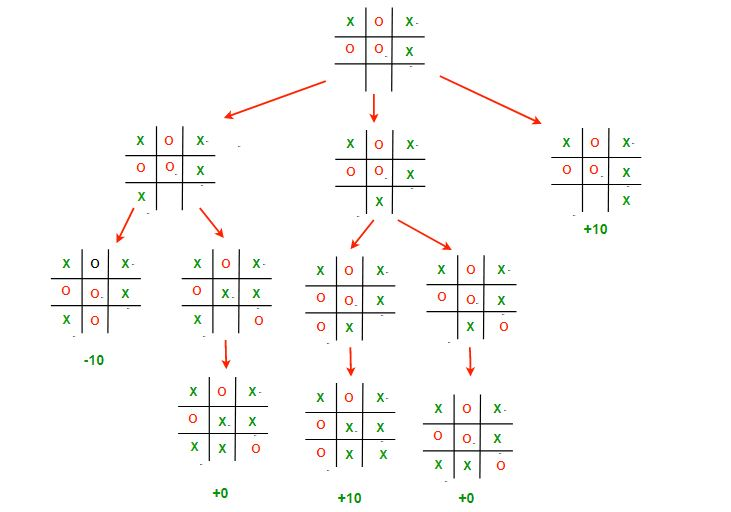

## Result
The Minimax algorithm for the given program has been studied and executed

(Since the state space of Tic-Tac-Toe is so small, we cannot have a tree with depth more than 9. Thus we don’t need to use techniques like alpha-beta pruning here)